<a href="https://colab.research.google.com/github/Prabhjot-Singh-13/Prabhjot-Singh-13/blob/main/TUNED_SVR_LIME_%26_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom.xlsx to Telecom.xlsx


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
from IPython.display import display

from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve

import random

In [ ]:
Description = pd.read_excel('Telecom.xlsx',sheet_name='Data Dict',index_col=1,header=1)
Description

,Unnamed: 0,Variable,Discerption
Data,,,
Telecom,NaN,CustomerID,Unique customer ID
Telecom,NaN,PlanTaken,Whether the customer has purchased the plan or...
Telecom,NaN,Age,Age of customer
Telecom,NaN,TypeofContact,How customer was contacted (Company Invited or...
Telecom,NaN,CityTier,City tier depends on the development of a city...
Telecom,NaN,DurationOfPitch,Duration of the pitch by a salesperson to the ...
Telecom,NaN,Occupation,Occupation of customer
Telecom,NaN,Gender,Gender of customer
Telecom,NaN,NumberOfPersons,Total number of persons planning to take the p...


In [ ]:
df = pd.read_excel('Telecom.xlsx',sheet_name='Telecom',index_col=0,header=0)
df

,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0


In [ ]:
df.shape

(4888, 19)

In [ ]:
df.duplicated().sum()

141

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlanTaken               4747 non-null   int64  
 1   Age                     4531 non-null   float64
 2   TypeofContact           4722 non-null   object 
 3   CityTier                4747 non-null   int64  
 4   DurationOfPitch         4501 non-null   float64
 5   Occupation              4747 non-null   object 
 6   Gender                  4747 non-null   object 
 7   NumberOfPersons         4747 non-null   int64  
 8   NumberOfFollowups       4703 non-null   float64
 9   PlanPitched             4747 non-null   object 
 10  PreferredServiceStar    4721 non-null   float64
 11  MaritalStatus           4747 non-null   object 
 12  NumberOfUpgrades        4609 non-null   float64
 13  iPhone                  4747 non-null   int64  
 14  PitchSatisfactionScore  4747 non-

In [ ]:
missingvalues = pd.DataFrame(df.isna().sum()/df.shape[0] * 100, columns=['Missing Values %'])
missingvalues

,Missing Values %
PlanTaken,0.000000
Age,4.550242
TypeofContact,0.526648
CityTier,0.000000
DurationOfPitch,5.182220
Occupation,0.000000
Gender,0.000000
NumberOfPersons,0.000000
NumberOfFollowups,0.926901
PlanPitched,0.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlanTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4531.0,37.585522,9.328723,18.0,31.0,36.0,44.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4501.0,15.510998,8.535634,5.0,9.0,13.0,20.0,127.0
NumberOfPersons,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4703.0,3.705082,1.008677,1.0,3.0,4.0,4.0,6.0
PreferredServiceStar,4721.0,3.583351,0.800351,3.0,3.0,3.0,4.0,5.0
NumberOfUpgrades,4609.0,3.233239,1.847851,1.0,2.0,3.0,4.0,22.0
iPhone,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


In [ ]:
df_copy = df.copy()

In [ ]:
contList = ['Age','DurationOfPitch','NumberOfUpgrades','MonthlyIncome']
catlist = df.drop(columns=contList).columns

In [ ]:
def BoxandHistogramplot(data, feature, figsize=(10,6), kde=False, bin=None):
  f2, (box, hist) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.30,0.70)},
      figsize=figsize)

  sns.boxplot(data=data, x=feature, ax=box, showmeans=True, color="pink")

  if bin:
    sns.histplot(data=data, x=feature, kde=kde, ax=hist, bin=bin, palette='summer')
  else:
    sns.histplot(data=data, x=feature, kde=kde, ax=hist)
  hist.axvline(data[feature].mean(), color="blue", linestyle="--")
  hist.axvline(data[feature].median(), color="red", linestyle="-")


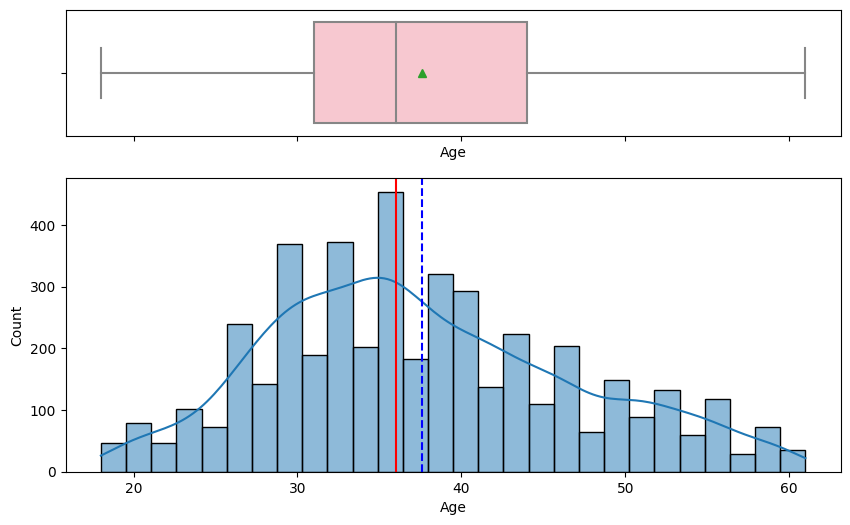

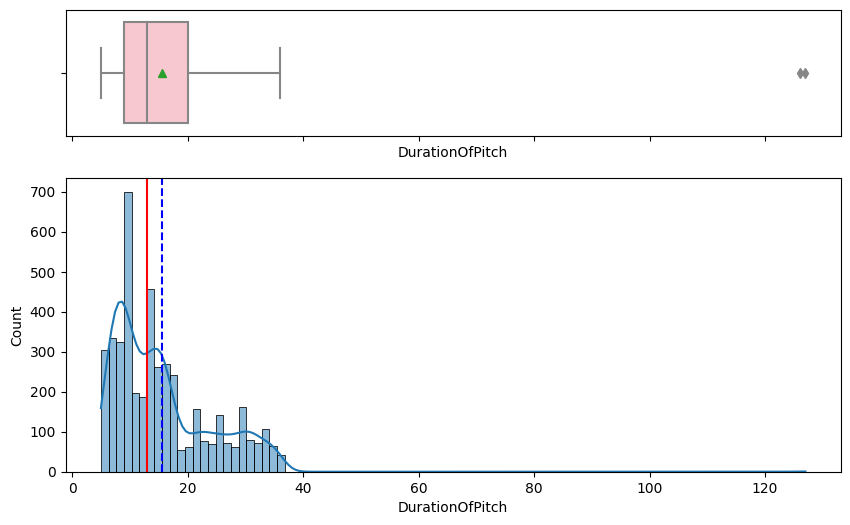

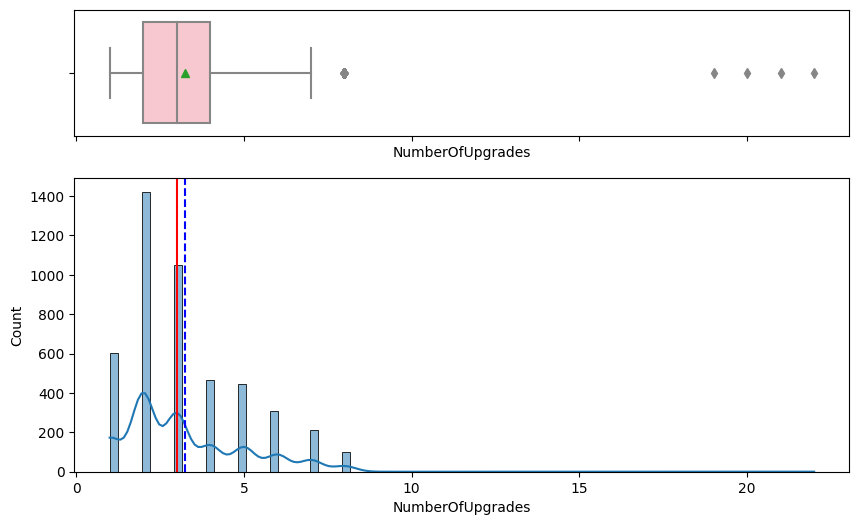

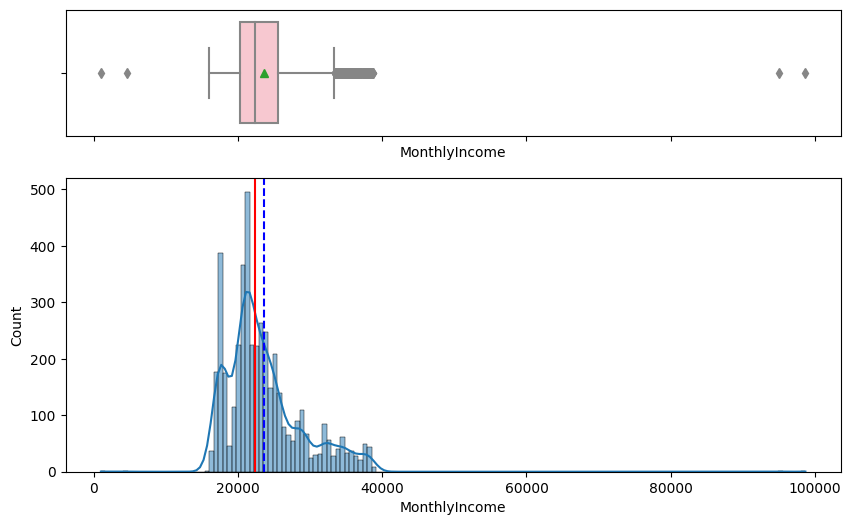

In [ ]:
for i in contList:
  BoxandHistogramplot(df, i, kde=True)

In [ ]:
def categoryBarPlot(data, feature):
  plt.figure(figsize=(data[feature].nunique() + 1, 6))
  plt.xticks(rotation=21, fontsize=7)
  ax = sns.countplot(data=data,x=feature, palette="Paired",
                     order=data[feature].value_counts().index[:].sort_values())

  for i in ax.patches:
    label = "{:.1f}".format(
        100 * i.get_height() / len(data[feature])
    )

    x = i.get_x() + i.get_width()/2
    y = i.get_height()

    ax.annotate(label,(x,y),ha="center", va="center",size=11,xytext=(0,5),textcoords="offset points")

  plt.show()

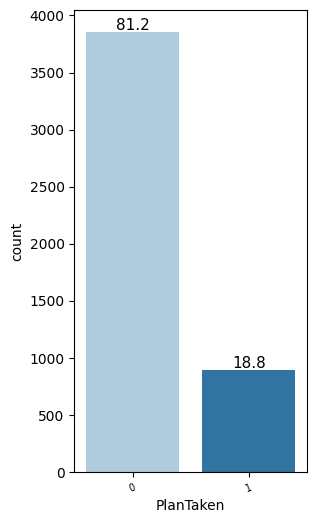

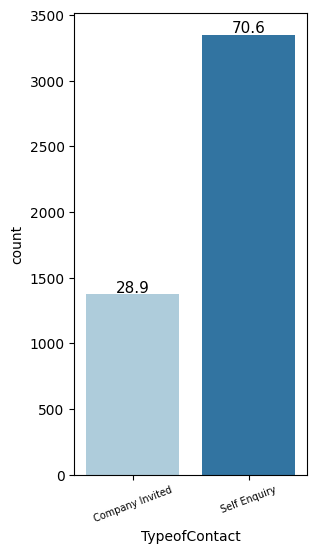

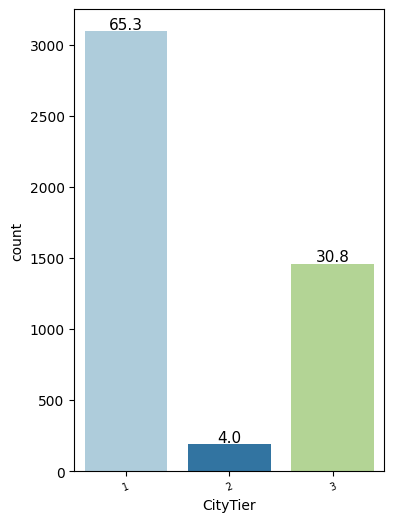

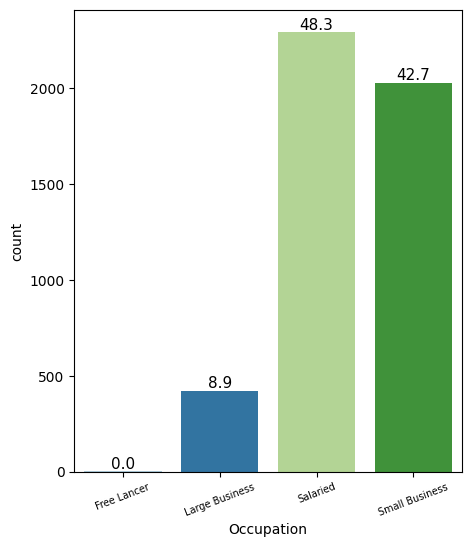

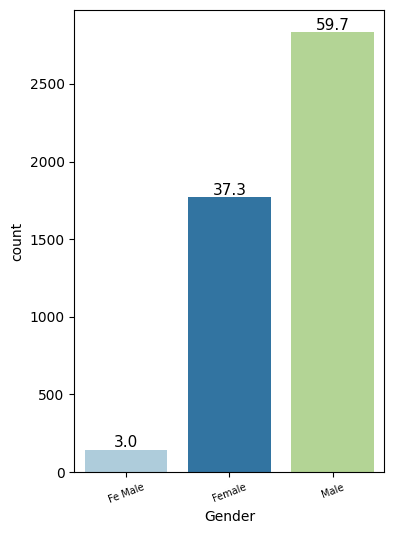

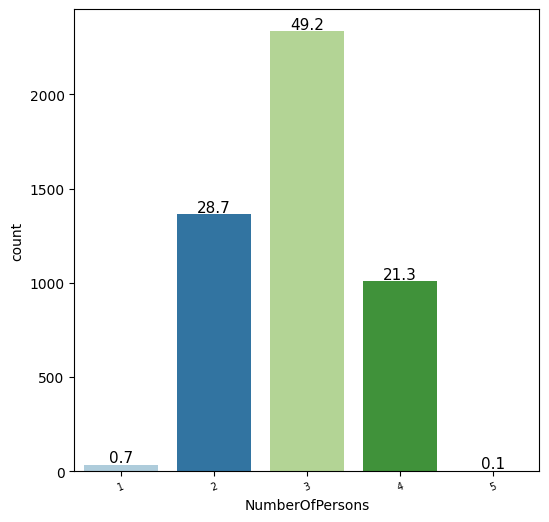

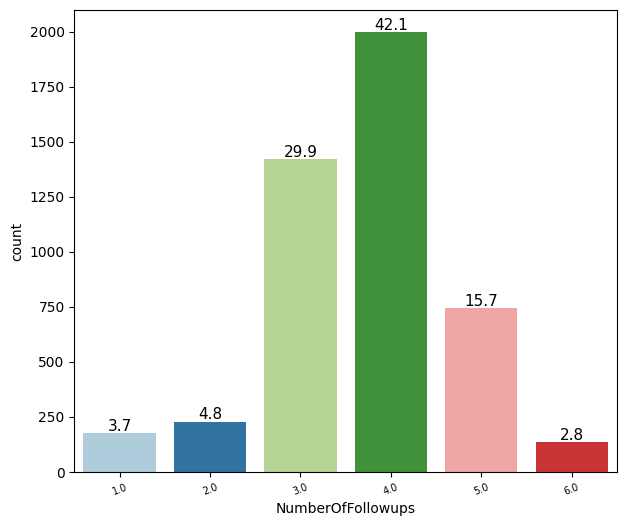

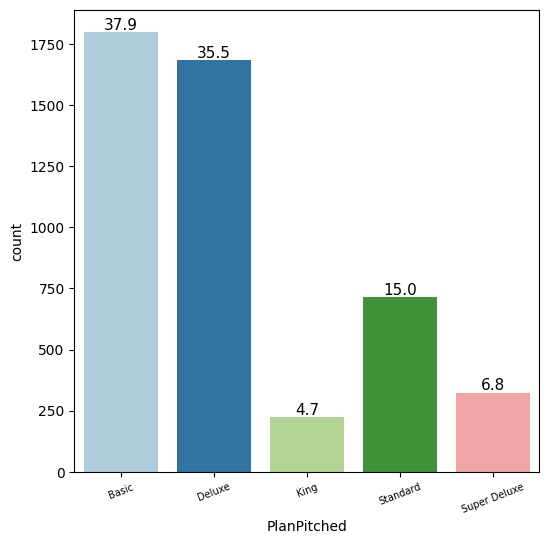

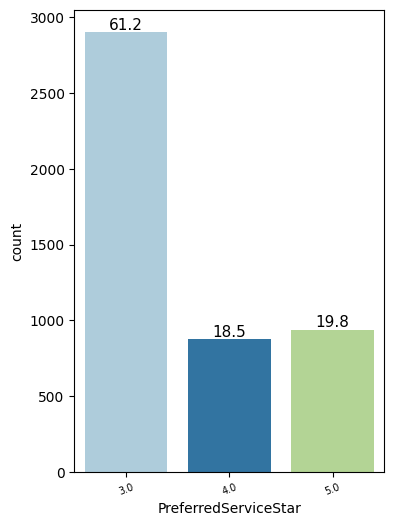

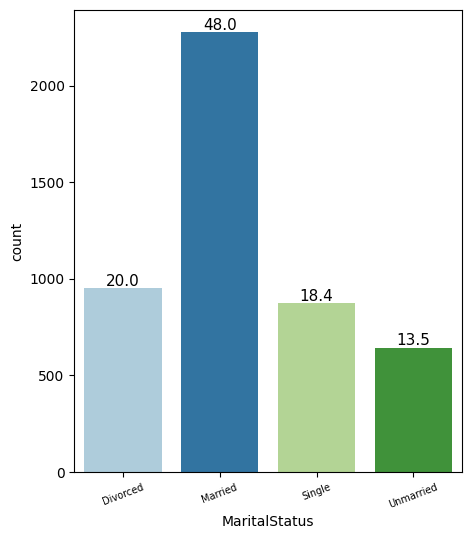

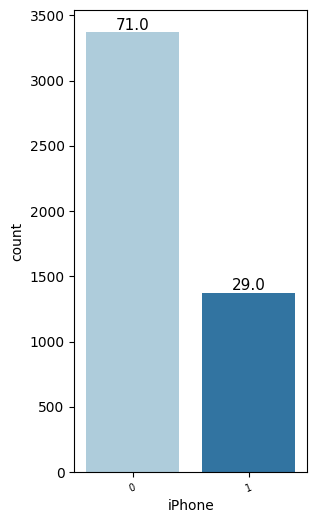

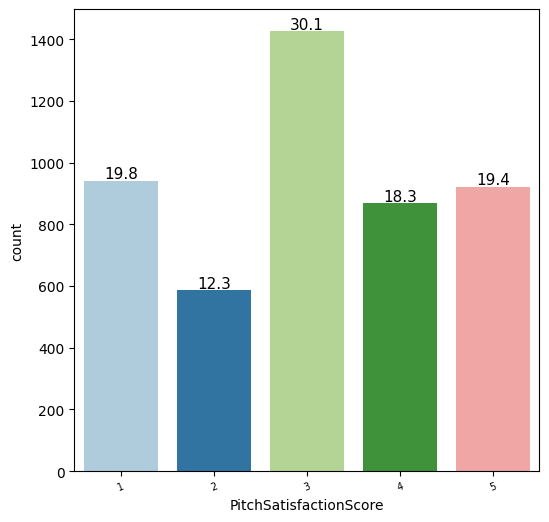

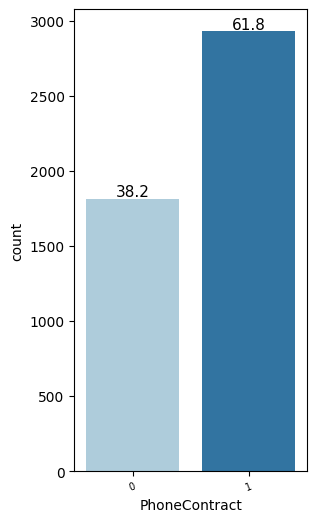

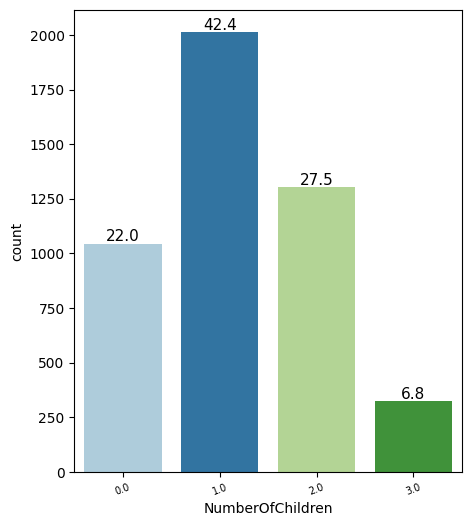

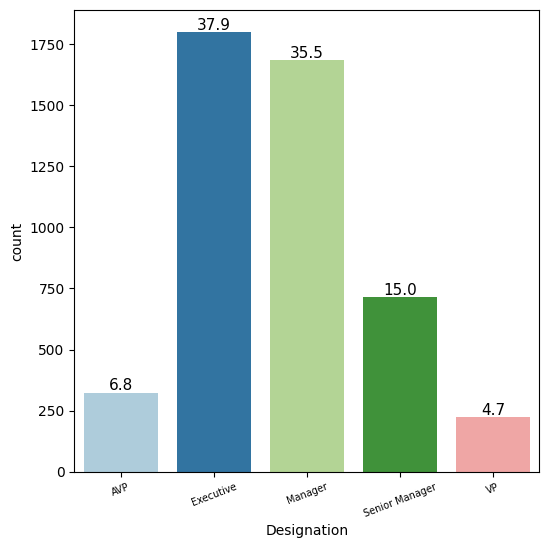

In [ ]:

for i in catlist:
  categoryBarPlot(df, i)

In [ ]:
Gender = {'Fe Male': 'Female', 'Female': 'Female', 'Male':'Male'}
MaritalStatus = {'Divorced':'Divorced','Married':'Married','Single':'Single','Unmarried':'Single'}
df_copy['Gender'] = df_copy['Gender'].map(Gender)
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].map(MaritalStatus)

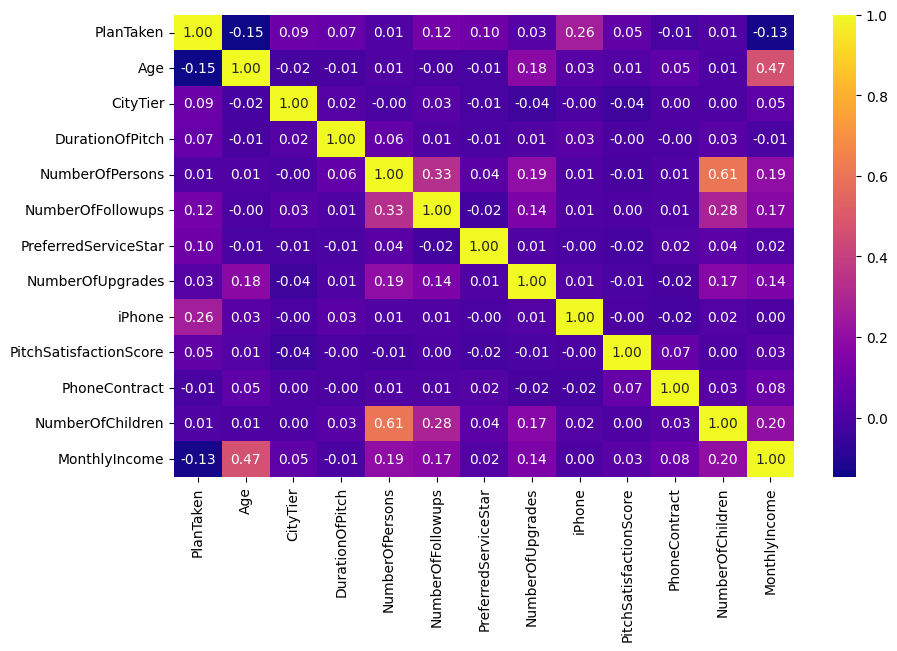

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[df.select_dtypes(include=['int64','float64']).columns].corr(), annot=True, fmt=".2f", cmap="plasma")
plt.show()

In [ ]:
def predictor_barplot(data, category, prediction):
  sort = data[prediction].value_counts().index[-1]
  table = pd.crosstab(data[category], data[prediction], margins=True).sort_values(
      by=sort, ascending=False
  )
  print(table)
  tab1 = pd.crosstab(data[category], data[prediction], normalize="index").sort_values(
      by=sort, ascending=False
  )
  tab1.plot(kind="bar", stacked=True, figsize=(data[category].nunique(), 4))
  plt.xticks(rotation=21, fontsize=9)
  plt.legend(loc="upper right", frameon=False)
  plt.legend(loc="lower right", bbox_to_anchor=(1,1))
  plt.show()
  print("#" * 80)

PlanTaken           0    1   All
TypeofContact                   
All              3831  891  4722
Self Enquiry     2753  597  3350
Company Invited  1078  294  1372


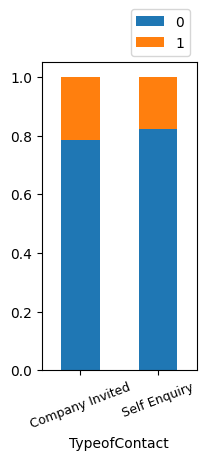

################################################################################
PlanTaken          0    1   All
Occupation                     
All             3853  894  4747
Salaried        1893  400  2293
Small Business  1654  374  2028
Large Business   306  118   424
Free Lancer        0    2     2


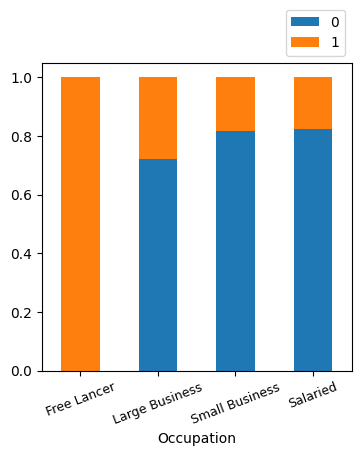

################################################################################
PlanTaken     0    1   All
Gender                    
All        3853  894  4747
Male       2273  562  2835
Female     1461  308  1769
Fe Male     119   24   143


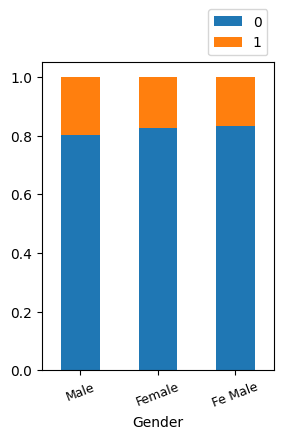

################################################################################
PlanTaken        0    1   All
PlanPitched                  
All           3853  894  4747
Basic         1260  540  1800
Deluxe        1486  198  1684
Standard       594  120   714
King           205   20   225
Super Deluxe   308   16   324


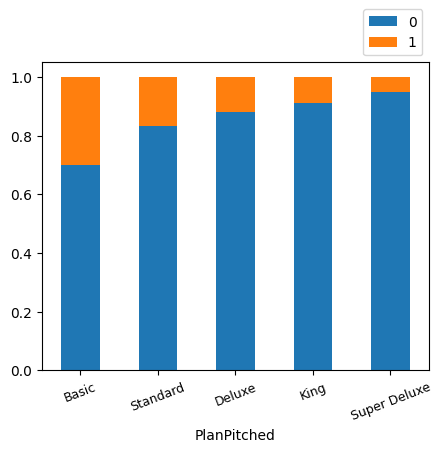

################################################################################
PlanTaken         0    1   All
MaritalStatus                 
All            3853  894  4747
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
Divorced        826  124   950


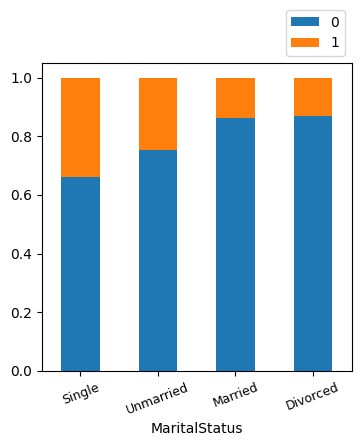

################################################################################
PlanTaken          0    1   All
Designation                    
All             3853  894  4747
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324


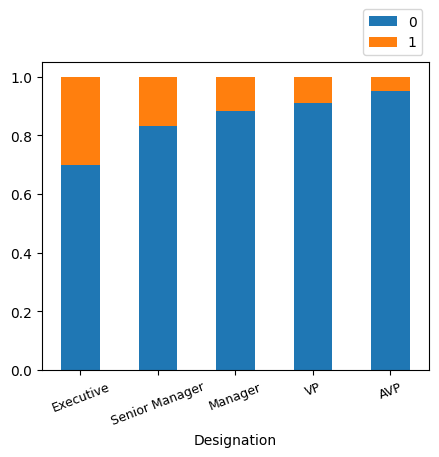

################################################################################


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  predictor_barplot(df, i,'PlanTaken')

In [ ]:
X = df_copy.drop(["PlanTaken"], axis=1)
Y = df_copy["PlanTaken"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=35)

In [ ]:
print("Training set : ", X_train.shape)
print("Test set : ", X_test.shape)

Training set :  (3797, 18)
Test set :  (950, 18)


In [ ]:
numerical = X_train.select_dtypes(include=['int64','float64']).columns
categorical = X_train.select_dtypes(include=['object']).columns

In [ ]:
TypeofContact = {'Self Enquiry':0,'Company Invited':1}
Occupation = {'Salaried':0,'Small Business':1,'Large Business':2,'Free Lancer':3}
Gender = {'Male':0,'Female':1}
PlanPitched = {'Basic':0,'Deluxe':1,'Standard':2,'Super Deluxe':3,'King':4}
MaritalStatus = {'Married':0,'Single':1,'Divorsed':2}
Designation = {'Executive':0,'Manager':1,'Senior Manager':2,'AVP':3,'VP':4}

X_train['TypeofContact'] = X_train['TypeofContact'].map(TypeofContact)
X_train['Occupation'] = X_train['Occupation'].map(Occupation)
X_train['Gender'] = X_train['Gender'].map(Gender)
X_train['PlanPitched'] = X_train['PlanPitched'].map(PlanPitched)
X_train['MaritalStatus'] = X_train['MaritalStatus'].map(MaritalStatus)
X_train['Designation'] = X_train['Designation'].map(Designation)

X_test['TypeofContact'] = X_test['TypeofContact'].map(TypeofContact)
X_test['Occupation'] = X_test['Occupation'].map(Occupation)
X_test['Gender'] = X_test['Gender'].map(Gender)
X_test['PlanPitched'] = X_test['PlanPitched'].map(PlanPitched)
X_test['MaritalStatus'] = X_test['MaritalStatus'].map(MaritalStatus)
X_test['Designation'] = X_test['Designation'].map(Designation)

In [ ]:
numImp = IterativeImputer(estimator=RandomForestRegressor(),initial_strategy='mean',
                          max_iter=5, random_state=35)
catImp = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent',
                          max_iter=5, random_state=35)

X_train[numerical] = numImp.fit_transform(X_train[numerical])
X_train[categorical] = catImp.fit_transform(X_train[categorical])

In [ ]:
X_test[numerical] = numImp.transform(X_test[numerical])
X_test[categorical] = catImp.transform(X_test[categorical])

In [ ]:
TypeofContact = {0:'Self Enquiry',1:'Company Invited'}
Occupation = {0:'Salaried',1:'Small Business',2:'Large Business',3:'Free Lancer'}
Gender = {0:'Male',1:'Female'}
PlanPitched = {0:'Basic',1:'Deluxe',2:'Standard',3:'Super Deluxe',4:'King'}
MaritalStatus = {0:'Married',1:'Single',2:'Divorsed'}
Designation = {0:'Executive',1:'Manager',2:'Senior Manager',3:'AVP',4:'VP'}

X_train['TypeofContact'] = X_train['TypeofContact'].map(TypeofContact)
X_train['Occupation'] = X_train['Occupation'].map(Occupation)
X_train['Gender'] = X_train['Gender'].map(Gender)
X_train['PlanPitched'] = X_train['PlanPitched'].map(PlanPitched)
X_train['MaritalStatus'] = X_train['MaritalStatus'].map(MaritalStatus)
X_train['Designation'] = X_train['Designation'].map(Designation)

X_test['TypeofContact'] = X_test['TypeofContact'].map(TypeofContact)
X_test['Occupation'] = X_test['Occupation'].map(Occupation)
X_test['Gender'] = X_test['Gender'].map(Gender)
X_test['PlanPitched'] = X_test['PlanPitched'].map(PlanPitched)
X_test['MaritalStatus'] = X_test['MaritalStatus'].map(MaritalStatus)
X_test['Designation'] = X_test['Designation'].map(Designation)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 200348 to 201295
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3797 non-null   float64
 1   TypeofContact           3797 non-null   object 
 2   CityTier                3797 non-null   float64
 3   DurationOfPitch         3797 non-null   float64
 4   Occupation              3797 non-null   object 
 5   Gender                  3797 non-null   object 
 6   NumberOfPersons         3797 non-null   float64
 7   NumberOfFollowups       3797 non-null   float64
 8   PlanPitched             3797 non-null   object 
 9   PreferredServiceStar    3797 non-null   float64
 10  MaritalStatus           3797 non-null   object 
 11  NumberOfUpgrades        3797 non-null   float64
 12  iPhone                  3797 non-null   float64
 13  PitchSatisfactionScore  3797 non-null   float64
 14  PhoneContract           3797 non-

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 203045 to 204777
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     950 non-null    float64
 1   TypeofContact           950 non-null    object 
 2   CityTier                950 non-null    float64
 3   DurationOfPitch         950 non-null    float64
 4   Occupation              950 non-null    object 
 5   Gender                  950 non-null    object 
 6   NumberOfPersons         950 non-null    float64
 7   NumberOfFollowups       950 non-null    float64
 8   PlanPitched             950 non-null    object 
 9   PreferredServiceStar    950 non-null    float64
 10  MaritalStatus           950 non-null    object 
 11  NumberOfUpgrades        950 non-null    float64
 12  iPhone                  950 non-null    float64
 13  PitchSatisfactionScore  950 non-null    float64
 14  PhoneContract           950 non-nu

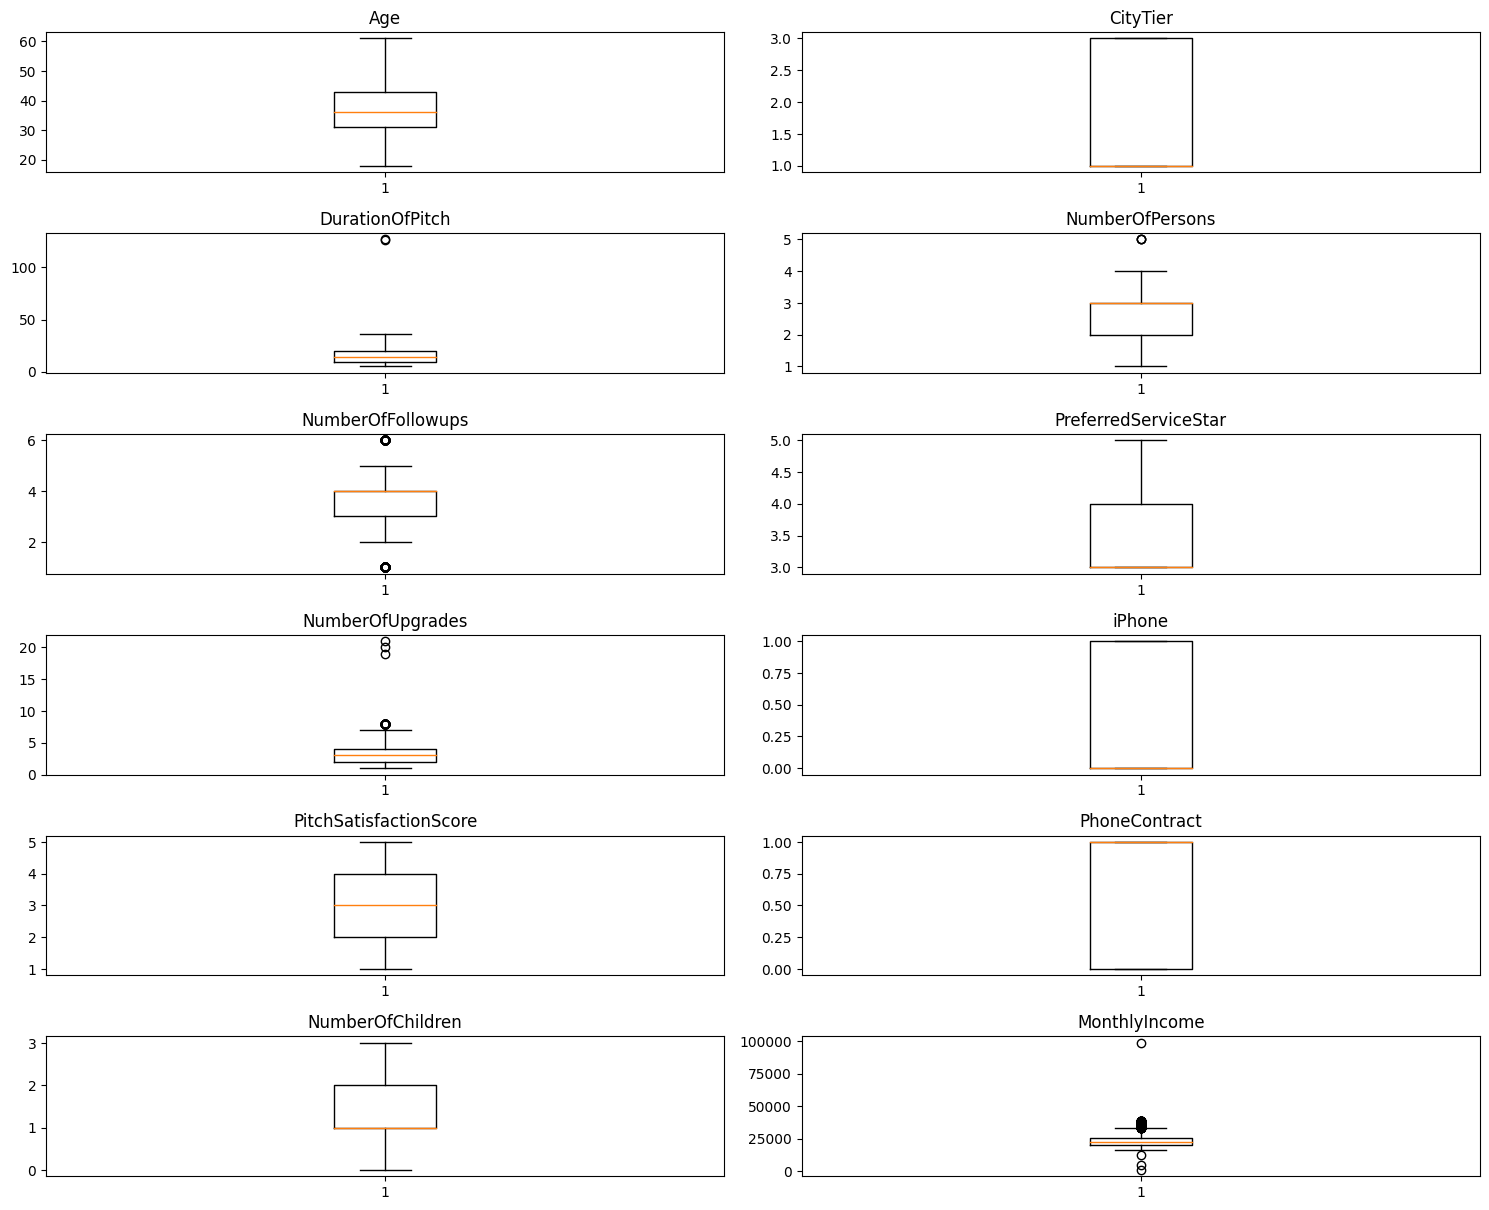

In [ ]:
plt.figure(figsize=(15, 20))
lst_numerical = X_train.select_dtypes(include=['float64']).columns

for i, column in enumerate(lst_numerical):
    plt.subplot(10, 2, i+1)
    plt.boxplot(X_train[column], whis=1.5)
    plt.tight_layout()
    plt.title(column)
plt.show()

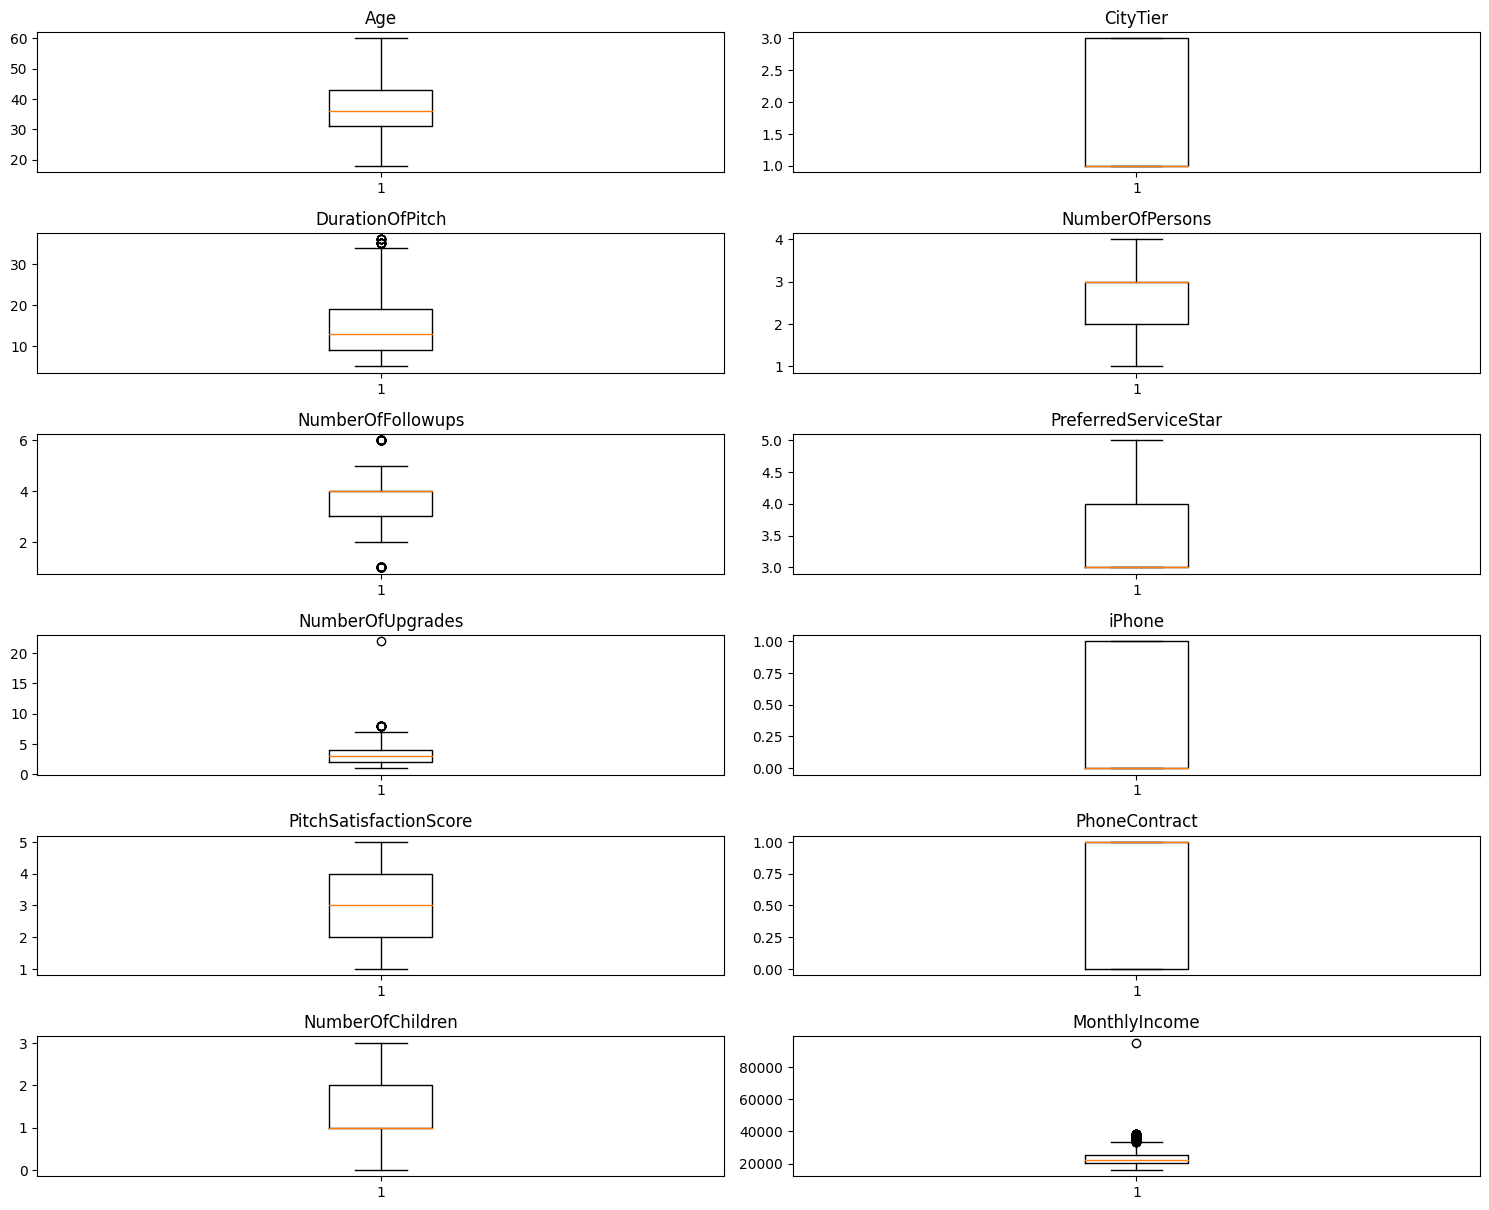

In [ ]:
plt.figure(figsize=(15, 20))
lst_numerical = X_train.select_dtypes(include=['float64']).columns
# Box plot for numerical categories
for i, column in enumerate(lst_numerical):
    plt.subplot(10, 2, i+1)
    plt.boxplot(X_test[column], whis=1.5)
    plt.tight_layout()
    plt.title(column)
plt.show()

In [ ]:
for column in lst_numerical:
    q1 = X_train[column].quantile(0.25)
    q3 = X_train[column].quantile(0.75)
    IQR = q3 - q1
    LowerWhisker = q1 - 1.5 * IQR
    UpperWhisker = q3 + 1.5 * IQR

    X_train[column] = np.clip(X_train[column], LowerWhisker, UpperWhisker)
    X_test[column] = np.clip(X_test[column], LowerWhisker, UpperWhisker)

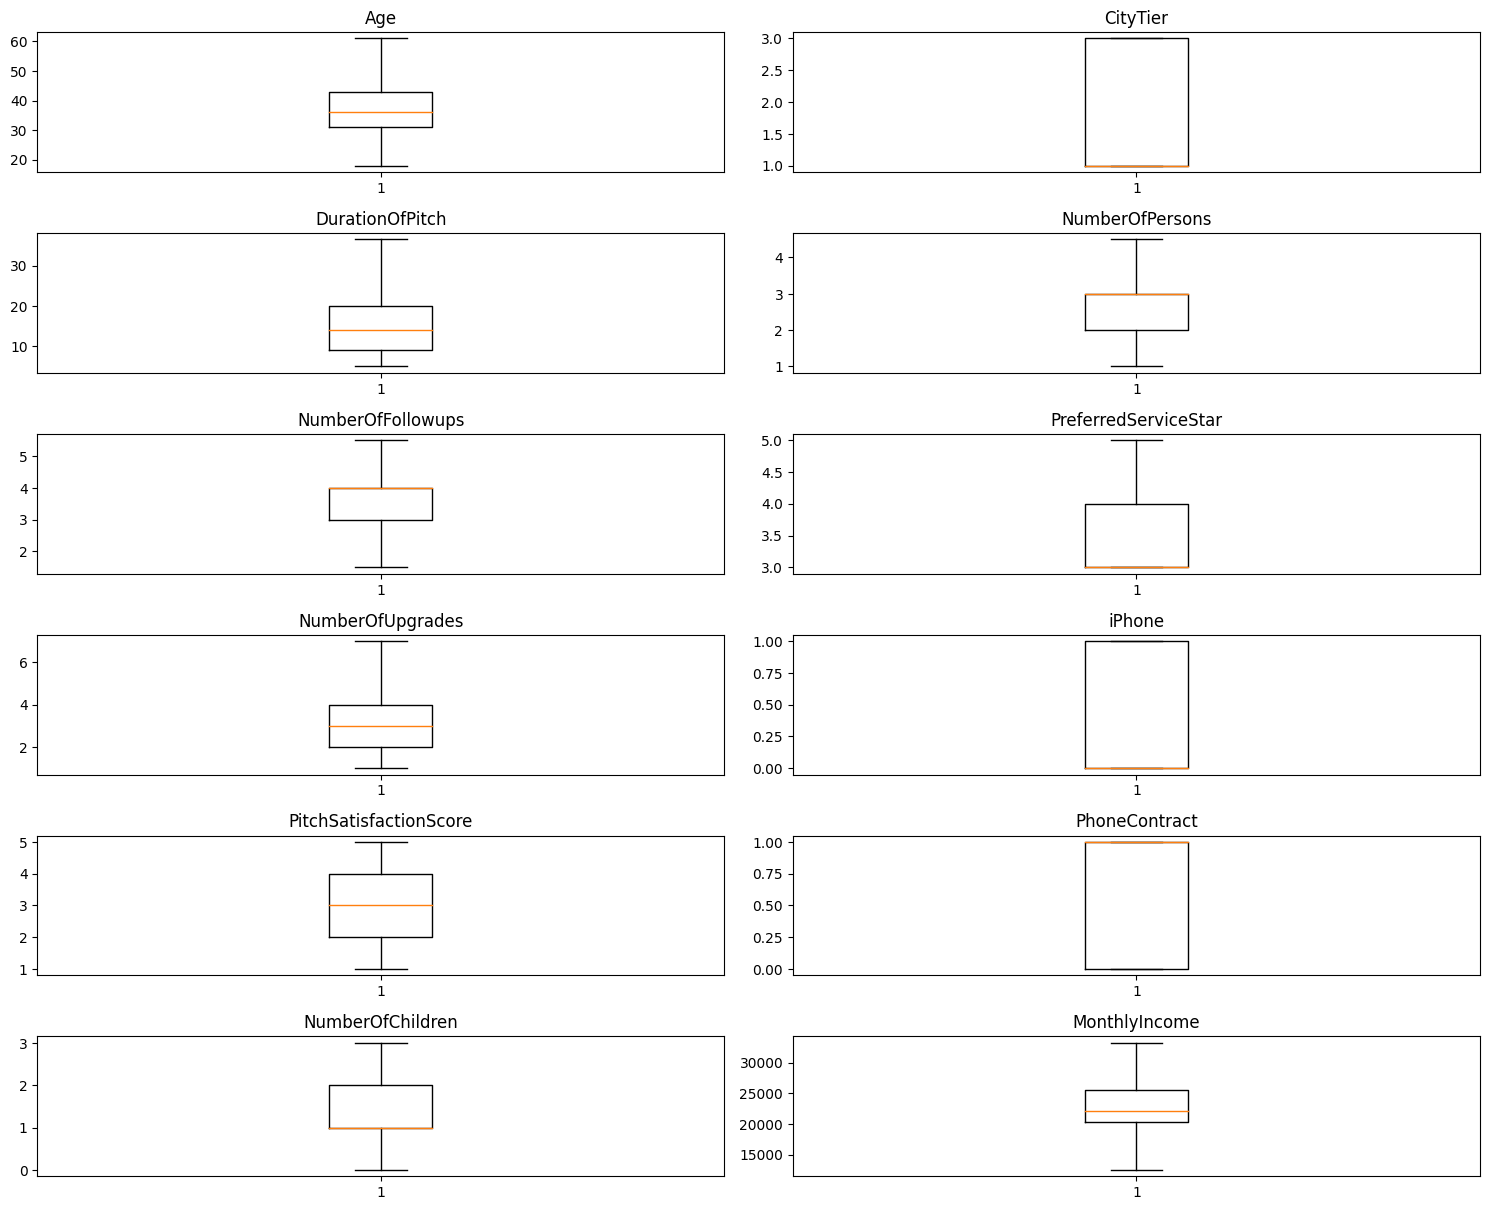

In [ ]:
plt.figure(figsize=(15, 20))
lst_numerical = X_train.select_dtypes(include=['float64']).columns

for i, column in enumerate(lst_numerical):
    plt.subplot(10, 2, i+1)
    plt.boxplot(X_train[column], whis=1.5)
    plt.tight_layout()
    plt.title(column)
plt.show()

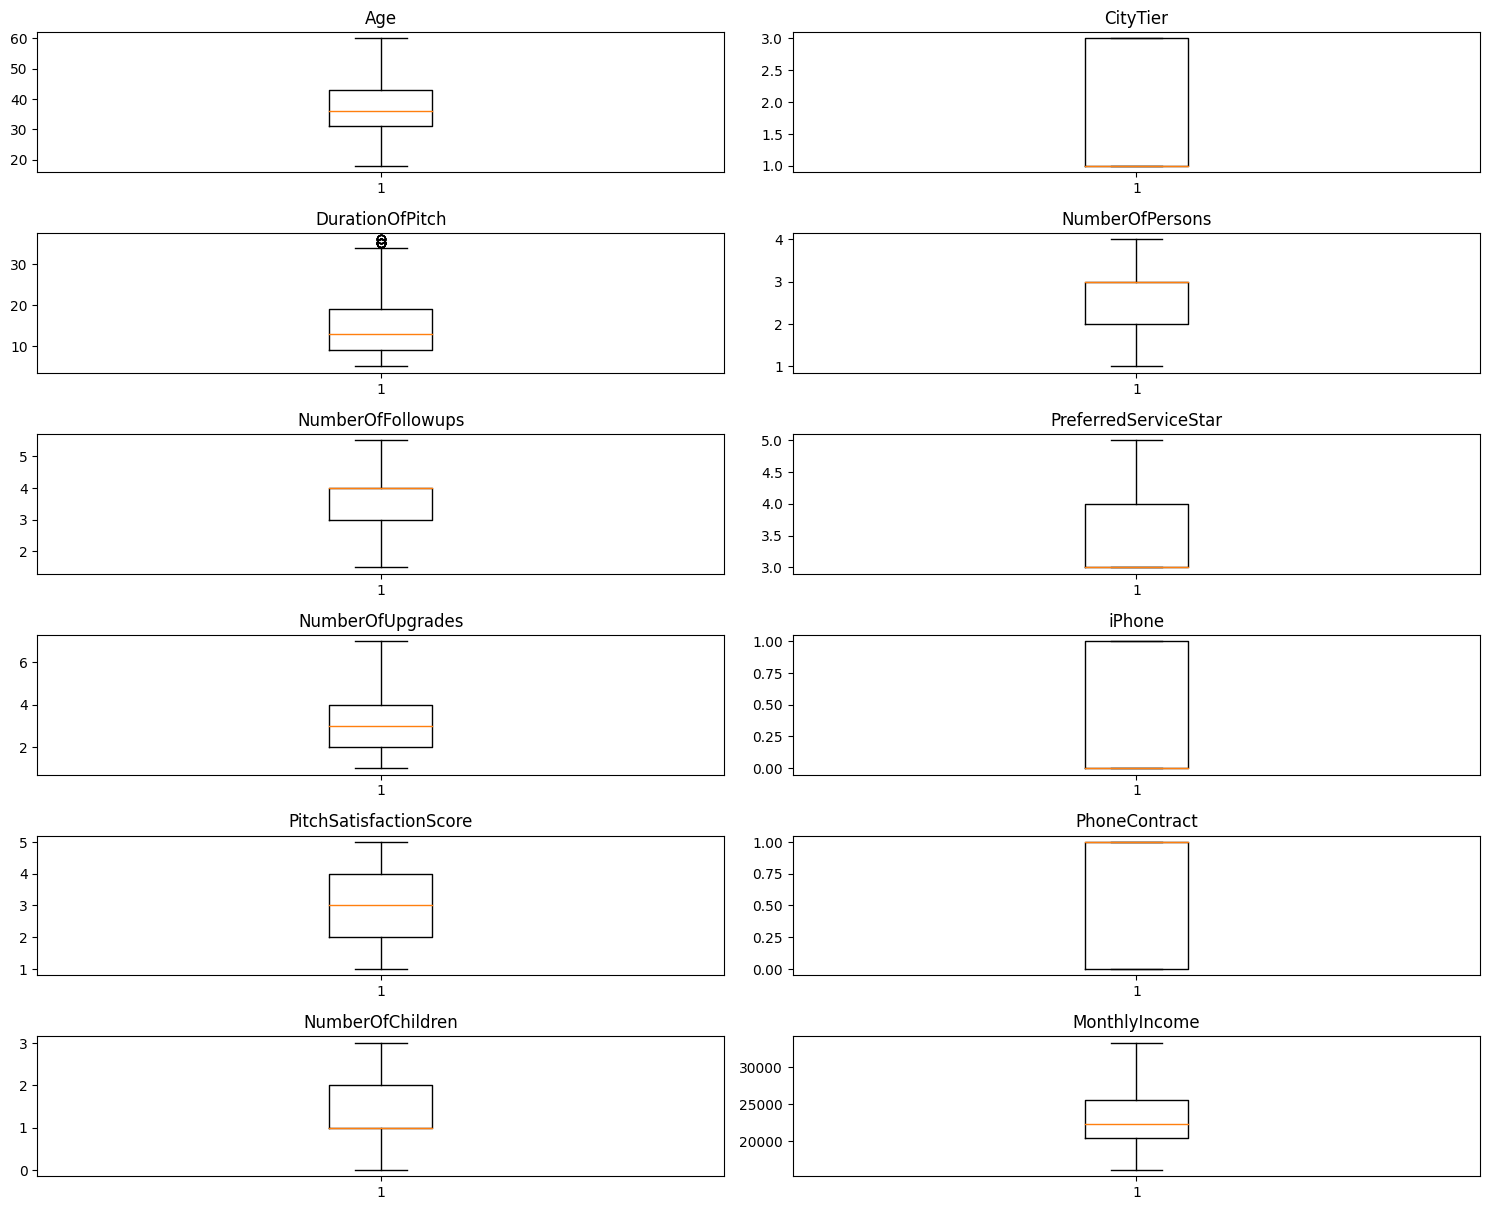

In [ ]:
plt.figure(figsize=(15, 20))
lst_numerical = X_train.select_dtypes(include=['float64']).columns

for i, column in enumerate(lst_numerical):
    plt.subplot(10, 2, i+1)
    plt.boxplot(X_test[column], whis=1.5)
    plt.tight_layout()
    plt.title(column)
plt.show()

In [ ]:
objectLst = X_train.select_dtypes(include=['object']).columns
ohEncoder = OneHotEncoder(handle_unknown='ignore')

encodedData = pd.DataFrame(ohEncoder.fit_transform(X_train[objectLst]).toarray(),
                           columns=ohEncoder.get_feature_names_out(),index = X_train.index)

X_train_new = pd.concat([X_train, encodedData], axis=1)

display(X_train_new)
X_train_new.drop(columns=objectLst,inplace=True)
print(X_train_new.shape)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,...,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CustomerID,,,,,,,,,,,,,,,,,,,,,
200348,42.0,Self Enquiry,1.0,29.0,Salaried,Female,2.0,3.0,Super Deluxe,3.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
203517,29.0,Self Enquiry,1.0,36.0,Salaried,Male,4.0,5.5,Deluxe,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
204622,37.0,Company Invited,3.0,15.0,Large Business,Male,3.0,4.0,Deluxe,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203799,37.0,Self Enquiry,3.0,24.0,Small Business,Male,3.0,5.0,Deluxe,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
203977,60.0,Self Enquiry,3.0,32.0,Salaried,Female,4.5,4.0,Standard,5.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202862,27.0,Self Enquiry,1.0,30.0,Salaried,Female,3.0,4.0,Basic,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
203391,53.0,Self Enquiry,3.0,12.0,Salaried,Male,4.0,4.0,Standard,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
203077,37.0,Self Enquiry,2.0,15.0,Salaried,Male,4.0,5.0,Basic,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


(3797, 31)


In [ ]:
encodedData = pd.DataFrame(ohEncoder.transform(X_test[objectLst]).toarray(),
                           columns=ohEncoder.get_feature_names_out(),index = X_test.index)

X_test_new = pd.concat([X_test, encodedData], axis=1)

display(X_test_new)
X_test_new.drop(columns=objectLst,inplace=True)
print(X_test_new.shape)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,...,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CustomerID,,,,,,,,,,,,,,,,,,,,,
203045,41.0,Company Invited,1.0,23.0,Small Business,Male,3.0,5.0,Deluxe,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
203454,56.0,Self Enquiry,1.0,7.0,Small Business,Male,3.0,2.0,Super Deluxe,3.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
204834,35.0,Company Invited,3.0,8.0,Salaried,Female,3.0,5.5,Basic,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
201358,31.0,Self Enquiry,3.0,16.0,Small Business,Female,2.0,3.0,Deluxe,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
201125,29.0,Company Invited,1.0,8.0,Salaried,Male,2.0,3.0,Deluxe,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202572,23.0,Self Enquiry,1.0,9.0,Large Business,Male,4.0,4.0,Basic,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
204787,37.0,Self Enquiry,1.0,13.0,Salaried,Male,3.0,5.5,Basic,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
201008,54.0,Self Enquiry,1.0,6.0,Small Business,Female,2.0,3.0,Super Deluxe,3.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


(950, 31)


In [ ]:
stdScaler = StandardScaler()
X_train_scaled = stdScaler.fit_transform(X_train_new)
X_test_scaled = stdScaler.transform(X_test_new)

In [ ]:

def confusion_Matrix(model, predictors, target):

    y_pred = model.predict(predictors)


    confusionMatrix = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) +
                          "\n{0:.2%}".format(item / confusionMatrix.flatten().sum())]
                         for item in confusionMatrix.flatten()]
    ).reshape(2, 2)

    plt.figure(figsize=(10, 5))
    sns.heatmap(confusionMatrix, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


    aucScore = roc_auc_score(target, y_pred)
    fpr, tpr, thresholds = roc_curve(target, y_pred)
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label="(AUC = %0.2f)" % aucScore)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="upper left")
    plt.show()

In [ ]:

def model_performance( model, predictors, target, threshold=0.5):

    pred = model.predict(predictors)

    y_pred = np.round(pred)

    acc = accuracy_score(target, y_pred)
    recall = recall_score(target, y_pred)
    precision = precision_score(target, y_pred)
    f1Score = f1_score(target, y_pred)

    modelPerformance = pd.DataFrame({"Accuracy": acc, "Recall": recall,
                            "Precision": precision, "F1-Score": f1Score},index=[0])

    return modelPerformance

In [ ]:
param = {'C': [10,100],
              'gamma': [1, 0.1],
              'kernel': ['linear','rbf']}

In [ ]:
tunedSVCModel = GridSearchCV(SVC(random_state=35), param, refit = True, verbose = 3)
tunedSVCModel.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.830 total time=   2.5s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.814 total time=   1.9s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.816 total time=   2.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.816 total time=   2.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.816 total time=   2.5s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.828 total time=   1.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.824 total time=   0.9s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.826 total time=   0.9s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.823 total time=   0.9s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.826 total time=   0.9s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.830 total time=   3.3s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;,

GridSearchCV(estimator=SVC(random_state=35),
             param_grid={'C': [10, 100], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
tunedSVCModel.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
tunedsvcModel = tunedSVCModel.best_estimator_

In [ ]:

model4svc_train = model_performance(tunedsvcModel, X_train_scaled, y_train)
model4svc_train

,Accuracy,Recall,Precision,F1-Score
0,1.0,1.0,1.0,1.0


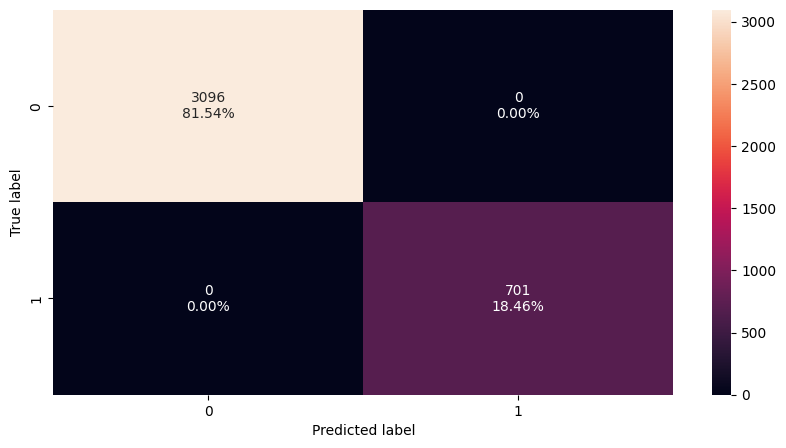

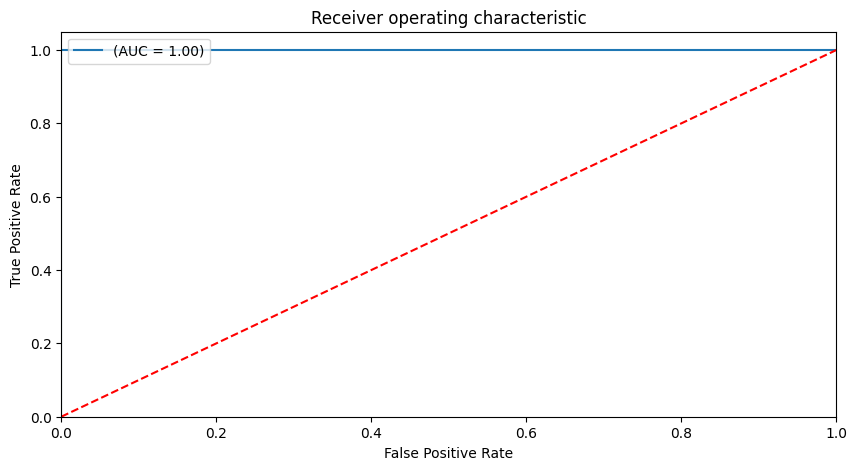

In [ ]:

confusion_Matrix(tunedsvcModel, X_train_scaled, y_train)

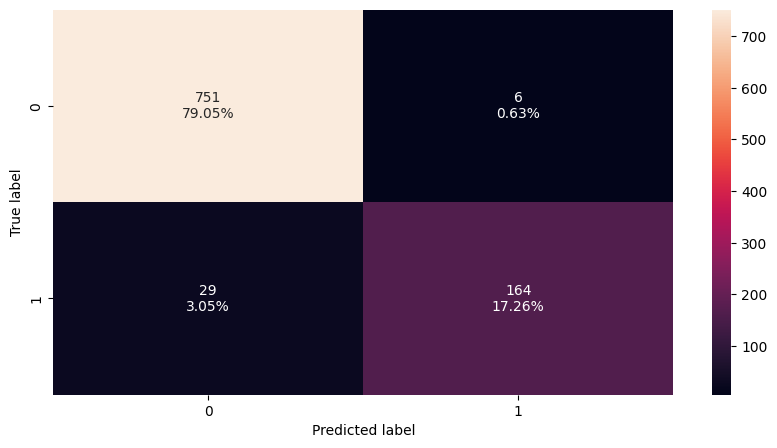

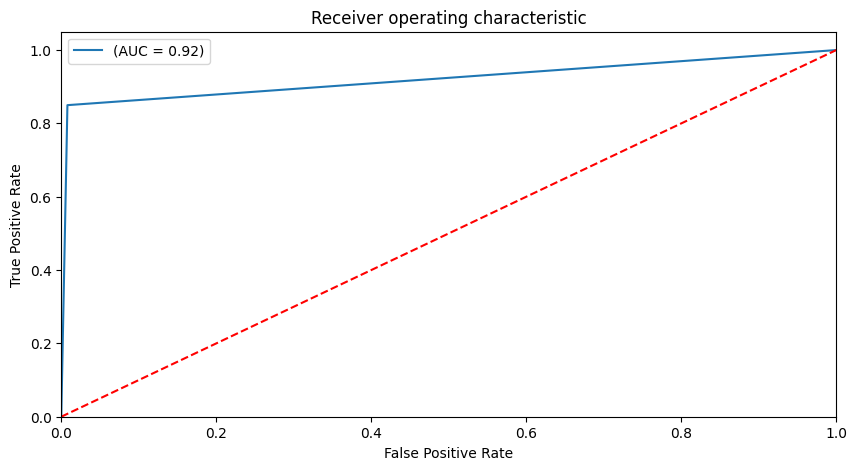

In [ ]:

confusion_Matrix(tunedsvcModel, X_test_scaled, y_test)

In [ ]:
svcFinalModel = SVC(random_state=35, probability=True, C=10, gamma= 0.1, kernel= 'rbf')
svcFinalModel.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1, probability=True, random_state=35)

In [ ]:
model_performance(svcFinalModel, X_train_scaled, y_train)

,Accuracy,Recall,Precision,F1-Score
0,0.999737,0.998573,1.0,0.999286


In [ ]:
model_performance(svcFinalModel, X_test_scaled, y_test)

,Accuracy,Recall,Precision,F1-Score
0,0.962105,0.84456,0.964497,0.900552


LIME

In [ ]:
!pip install lime
import lime
from lime import lime_tabular


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
feature_names=X_train_new.columns.tolist()

In [ ]:
limeExplainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X_train_new.columns.tolist(),
    class_names=['Not Taken', 'Taken'],
    discretize_continuous=True,
    mode='classification'
)

In [ ]:
index = random.randint(1, len(X_test_new))
rowInstance = X_test_scaled[index]

In [ ]:
svcModel = svcFinalModel
explanation = limeExplainer.explain_instance(data_row=rowInstance,predict_fn=svcModel.predict_proba,num_features=len(X_train_new.columns))
explanation.show_in_notebook()

LIME LOCAL


In [ ]:
import lime.lime_tabular  #

svcModel = svcFinalModel
explanation = limeExplainer.explain_instance(data_row=rowInstance, predict_fn=svcModel.predict_proba, num_features=len(X_train_new.columns))


localfeature = explanation.as_list()


for feature, weight in localfeature:
    print(f"Feature: {feature}, Weight: {weight}")

Feature: -0.64 < iPhone <= 1.55, Weight: 0.1415977960834213
Feature: -0.72 < CityTier <= 1.46, Weight: 0.0644119369878338
Feature: DurationOfPitch > 0.56, Weight: 0.06271820269507528
Feature: Age <= -0.71, Weight: 0.04902675461471379
Feature: -0.78 < Designation_Executive <= 1.28, Weight: 0.03990452233500069
Feature: -0.78 < PlanPitched_Basic <= 1.28, Weight: 0.039853821515592545
Feature: Designation_Manager <= -0.75, Weight: 0.03762745345186746
Feature: PlanPitched_Deluxe <= -0.75, Weight: 0.034533656906658154
Feature: -0.71 < MaritalStatus_Single <= 1.42, Weight: 0.025464076091138203
Feature: PitchSatisfactionScore <= -0.78, Weight: -0.02408378215056504
Feature: PlanPitched_Super Deluxe <= -0.27, Weight: 0.02294260947997415
Feature: NumberOfUpgrades <= -0.71, Weight: -0.02188098150384829
Feature: Designation_AVP <= -0.27, Weight: 0.020921310488958064
Feature: PlanPitched_Standard <= -0.42, Weight: 0.020037909663399613
Feature: TypeofContact_Company Invited <= -0.64, Weight: -0.018334

There are many local features like MaritalStatus_Divorced, Designation_VP, Occupation_Salaried which has positive or negative weights & they are assigned with some values.

Salaried Occupation has positive weight which says that when we will change the value of that feature, we will move towards positive sentiment i.e. Plan Taken & same with other features also.

LIME GLOBAL

In [ ]:
proba_plantaken = svcModel.predict_proba(X_test_scaled)[:,1]

In [ ]:
importances_1 = { i: 0.0 for i in range(X_test_new.shape[1]) }
importances_0 = { i: 0.0 for i in range(X_test_new.shape[1]) }

In [ ]:
no_explain = X_test_new.shape[0]

In [ ]:
for indx in range(no_explain):

    explanation = limeExplainer.explain_instance(data_row=X_test_scaled[index],predict_fn=svcModel.predict_proba,num_features=len(X_train_new.columns))

    explain_map = explanation.as_map()


    label = [explain_map[1][i][0] for i in range(len(explain_map[1]))]

    weight = [explain_map[1][i][1] for i in range(len(explain_map[1]))]


    if(proba_plantaken[indx] >= 0.5):
        for i in range(len(label)):
            importances_1[label[i]] = importances_1[label[i]] + weight[i]
    else:
        for i in range(len(label)):
            importances_0[label[i]] = importances_0[label[i]] + weight[i]

In [ ]:
for i in range(X_test_new.shape[1]):
    importances_1[i] = importances_1[i] / (no_explain*1.0)
    importances_0[i] = importances_0[i] / (no_explain*1.0)

,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,...,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.043499,0.049976,0.052800,0.008905,0.007844,-0.001985,-0.016879,0.115854,-0.018258,-0.003311,...,0.009773,0.014075,0.019612,0.014737,0.021967,0.019793,0.029337,0.030377,0.014027,0.009601
1,0.009707,0.011263,0.011855,0.001957,0.001723,-0.000430,-0.003810,0.026055,-0.004149,-0.000771,...,0.002153,0.003231,0.004476,0.003228,0.004888,0.004455,0.006542,0.006850,0.003264,0.002090


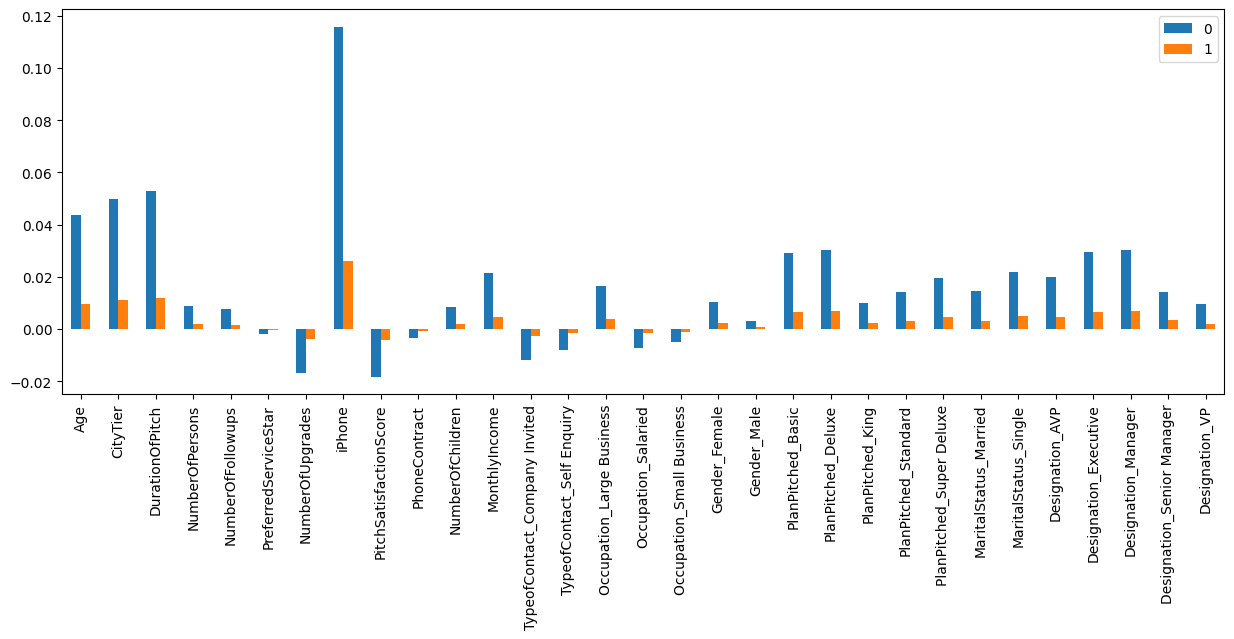

In [ ]:
importance = pd.DataFrame([importances_0,importances_1],index=[0,1]).T
importance.index = X_test_new.columns
display(importance.T)
importance.plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=90, fontsize=10)
plt.show()

From above analysis, we came to know that Phone Contract & Gender_Male doesnot make any difference whether a customer will take a plan or not.

By doing random calculation, values of feature are changing, so we need a better method to calculate exact probability of plan taken or not.

Method like SHAP is useful in this manner but the problem with SHAP is that it ia taking much more time to train the model.

SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(svcFinalModel.predict_proba, X_train_scaled)

In [ ]:
inst_indx = 0

shap_values = explainer.shap_values(X_train_scaled[inst_indx])
print(shap_values)

In [ ]:
%%shell
jupyter nbconvert --to html /content/TUNED_SVR_LIME_&_SHAP.ipynb